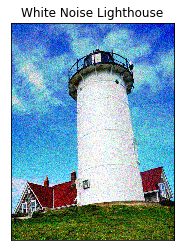

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#load white noise image
image_path_wn = "./gaussian_lighthouse.png" 
img_wn = cv2.imread(image_path_wn)
img_wn = cv2.cvtColor(img_wn, cv2.COLOR_BGR2RGB)

plt.imshow(img_wn)
plt.xticks([]), plt.yticks([])
plt.title('White Noise Lighthouse')
plt.show()


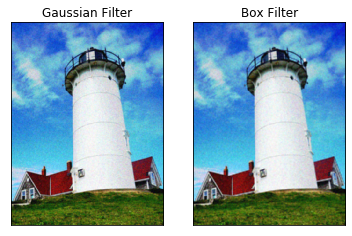

In [3]:
#gaussian filter
filt_gauss_wn = cv2.GaussianBlur(img_wn, (5,5), 2)

#box filter
kernel = np.ones((5,5), np.float32)/(5*5)
filt_box_wn = cv2.filter2D(img_wn, -1, kernel)

plt.subplot(121), plt.imshow(filt_gauss_wn)
plt.xticks([]), plt.yticks([]), plt.title('Gaussian Filter')
plt.subplot(122), plt.imshow(filt_box_wn)
plt.xticks([]), plt.yticks([]), plt.title('Box Filter')
plt.show()

In [4]:
#psnr
gauss_psnr_wn = cv2.PSNR(img_wn,filt_gauss_wn)
box_psnr_wn = cv2.PSNR(img_wn,filt_box_wn)

print('Gaussian Filter PSNR: ', gauss_psnr_wn)
print('Box Filter PSNR: ',box_psnr_wn)
print('')
if gauss_psnr_wn>box_psnr_wn:
    print('The Guassian Filter offers the superior result.')
else:
    print('The Box Filter offers the superior result.')

Gaussian Filter PSNR:  20.060771667432213
Box Filter PSNR:  19.722373582855695

The Guassian Filter offers the superior result.


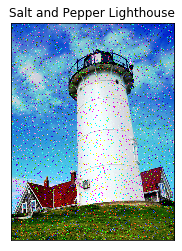

In [5]:
image_path = "./saltandpepper_lighthouse.png" 
img_sp = cv2.imread(image_path)
img_sp = cv2.cvtColor(img_sp, cv2.COLOR_BGR2RGB)

plt.imshow(img_sp)
plt.xticks([]), plt.yticks([])
plt.title('Salt and Pepper Lighthouse')
plt.show() 

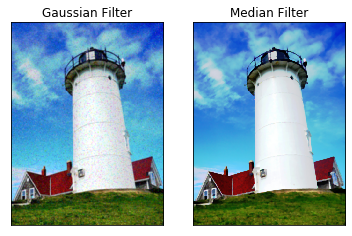

In [6]:
#gaussian filter
filt_gauss_sp = cv2.GaussianBlur(img_sp, (5,5), 2)

#median filter
filt_median_sp = cv2.medianBlur(img_sp, 5)

plt.subplot(121), plt.imshow(filt_gauss_sp)
plt.xticks([]), plt.yticks([]), plt.title('Gaussian Filter')
plt.subplot(122), plt.imshow(filt_median_sp)
plt.xticks([]), plt.yticks([]), plt.title('Median Filter')
plt.show() 

In [7]:
#psnr
gauss_psnr_sp = cv2.PSNR(img_sp,filt_gauss_sp)
median_psnr_sp = cv2.PSNR(img_sp,filt_median_sp)

print('Gaussian Filter PSNR: ', gauss_psnr_sp)
print('Median Filter PSNR: ',median_psnr_sp)
print('')
if gauss_psnr_sp>median_psnr_sp:
    print('The Guassian Filter offers the superior result.')
else:
    print('The Median Filter offers the superior result.')

Gaussian Filter PSNR:  17.45513288760649
Median Filter PSNR:  17.122398794906918

The Guassian Filter offers the superior result.


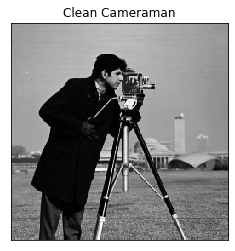

In [8]:
#sobel - clean
image_path_sb = "./cameraman.png" 
img_sb = cv2.imread(image_path_sb,cv2.IMREAD_GRAYSCALE)


plt.imshow(img_sb,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Clean Cameraman')
plt.show()

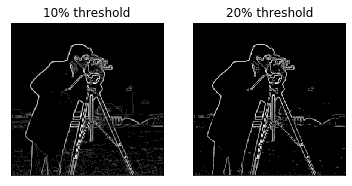

In [79]:
#3 by 3 kernel
sb_3x = cv2.Sobel(img_sb,cv2.CV_64F,1,0,ksize=3)
sb_3y = cv2.Sobel(img_sb,cv2.CV_64F,0,1,ksize=3)
sb_3m = cv2.magnitude(sb_3x, sb_3y)

max_3mag = np.max(sb_3m)

det,sb_3thresh1 = cv2.threshold(sb_3m,0.1*max_3mag,0,cv2.THRESH_TOZERO)
det,sb_3thresh2 = cv2.threshold(sb_3m,0.2*max_3mag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(sb_3thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(sb_3thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()


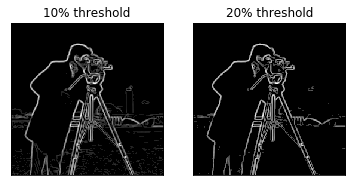

In [10]:
#5 by 5 kernel
sb_5x = cv2.Sobel(img_sb,cv2.CV_64F,1,0,ksize=5)
sb_5y = cv2.Sobel(img_sb,cv2.CV_64F,0,1,ksize=5)
sb_5m = cv2.magnitude(sb_5x, sb_5y)

max_5mag = np.max(sb_5m)


det,sb_5thresh1 = cv2.threshold(sb_5m,0.1* max_5mag,0,cv2.THRESH_TOZERO)
det,sb_5thresh2 = cv2.threshold(sb_5m,0.2*max_5mag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(sb_5thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(sb_5thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()

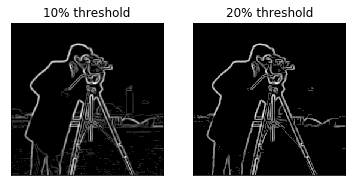

In [11]:
#7 by 7 kernel
sb_7x = cv2.Sobel(img_sb,cv2.CV_64F,1,0,ksize=7)
sb_7y = cv2.Sobel(img_sb,cv2.CV_64F,0,1,ksize=7)
sb_7m = cv2.magnitude(sb_7x, sb_7y)

max_7mag = np.max(sb_7m)

det,sb_7thresh1 = cv2.threshold(sb_7m,0.1*max_7mag,0,cv2.THRESH_TOZERO)
det,sb_7thresh2 = cv2.threshold(sb_7m,0.2*max_7mag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(sb_7thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(sb_7thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()

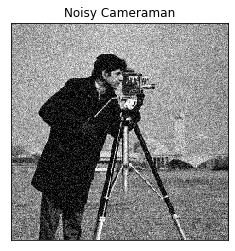

In [12]:
#sobel - noisy
image_path_sbg = "./gaussian_cameraman.png" 
img_sbg = cv2.imread(image_path_sbg,cv2.IMREAD_GRAYSCALE)


plt.imshow(img_sbg,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Noisy Cameraman')
plt.show()

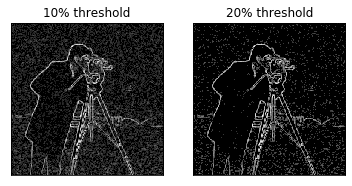

In [13]:
#3 by 3 kernel - pre denoising
sb_gx = cv2.Sobel(img_sbg,cv2.CV_64F,1,0,ksize=3)
sb_gy = cv2.Sobel(img_sbg,cv2.CV_64F,0,1,ksize=3)
sb_gm = cv2.magnitude(sb_gx, sb_gy)

max_gmag = np.max(sb_gm)

det,sb_gthresh1 = cv2.threshold(sb_gm,0.1*max_gmag,0,cv2.THRESH_TOZERO)
det,sb_gthresh2 = cv2.threshold(sb_gm,0.2*max_gmag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(sb_gthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(sb_gthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()

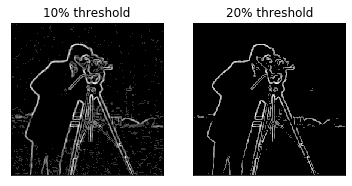

In [14]:
# 3 by 3 kernel post denoising
kernel = np.ones((3,3), np.float32)/(3*3)
filt_sb = cv2.filter2D(img_sbg, -1, kernel)

sb_fx = cv2.Sobel(filt_sb,cv2.CV_64F,1,0,ksize=3)
sb_fy = cv2.Sobel(filt_sb,cv2.CV_64F,0,1,ksize=3)
sb_fm = cv2.magnitude(sb_fx, sb_fy)

det,sb_fthresh1 = cv2.threshold(sb_fm,0.1*max_gmag,0,cv2.THRESH_TOZERO)
det,sb_fthresh2 = cv2.threshold(sb_fm,0.2*max_gmag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(sb_fthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(sb_fthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()


In [16]:
# Laplacian of Gaussian
image_path_log = "./cameraman.png" 
img_log = cv2.imread(image_path_log,cv2.IMREAD_GRAYSCALE)



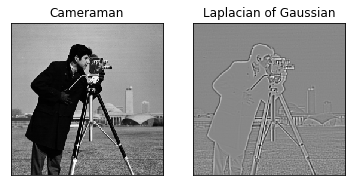

In [57]:
#laplacian

img_lap = cv2.Laplacian(img_log, cv2.CV_32F, ksize=5)

plt.subplot(121), plt.imshow(img_log,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Cameraman')

plt.subplot(122), plt.imshow(img_lap,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Laplacian of Gaussian')
plt.show()

[  0   0   0 ... 255 255 255]


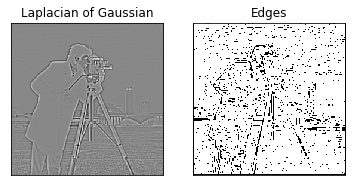

In [71]:
#own edge detection, remember zero crossings
import copy
img_edge = copy.deepcopy(img_lap)
image = copy.deepcopy(img_lap)
height,width = img_lap.shape
#print(height,width)

for i in range(0,height):
    for j in range(0,width):
        img_edge[i,j]=0
        
for i in range(1, height - 1):
        for j in range(1, width - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1], \
                         image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel

            if z_c:
              if image[i,j]>0 and np.abs(e)>1500:
                  img_edge[i, j] = image[i,j] + np.abs(e)
              elif image[i,j]<0 and d>1500:
                  img_edge[i, j] = np.abs(image[i,j]) + d
            
        
plt.subplot(121), plt.imshow(img_lap,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Laplacian of Gaussian')

plt.subplot(122), plt.imshow(img_edge,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Edges')
plt.show()

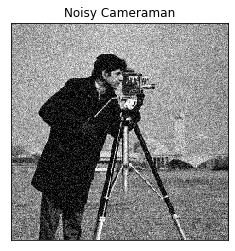

In [100]:
#derivative of gaussian
image_path_dg = "./gaussian_cameraman.png" 
img_dg = cv2.imread(image_path_dg,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_dg,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Noisy Cameraman')
plt.show()



temp = cv2.getGaussianKernel(7,-1)
Gauss = np.outer( temp , temp.transpose())

#3 by 3 kernel
Gauss_x = cv2.Sobel(Gauss,cv2.CV_64F,1,0,ksize=3)
Gauss_y = cv2.Sobel(Gauss,cv2.CV_64F,0,1,ksize=3)

img_dgx = cv2.filter2D(img_dg,-1,Gauss_x)
img_dgy = cv2.filter2D(img_dg,-1,Gauss_y)
max_x = np.max(img_dgx)
max_y = np.max(img_dgy)

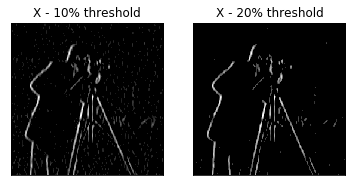

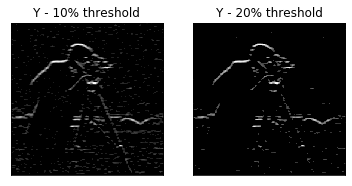

In [98]:

det,dg_threshx1 = cv2.threshold(img_dgx,0.1*max_x,0,cv2.THRESH_TOZERO) 
det,dg_threshx2 = cv2.threshold(img_dgx,0.2*max_x,0,cv2.THRESH_TOZERO)

det,dg_threshy1 = cv2.threshold(img_dgy,0.1*max_y,0,cv2.THRESH_TOZERO) 
det,dg_threshy2 = cv2.threshold(img_dgy,0.2*max_y,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(dg_threshx1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('X - 10% threshold')

plt.subplot(122),plt.imshow(dg_threshx2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('X - 20% threshold')
plt.show()

plt.subplot(121), plt.imshow(dg_threshy1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Y - 10% threshold')

plt.subplot(122),plt.imshow(dg_threshy2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Y - 20% threshold')
plt.show()

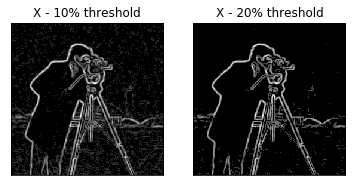

In [102]:
#5by5 gauss then 3by3 sobel
gauss5 = cv2.GaussianBlur(img_dg, (5,5), 0)

dg_3x = cv2.Sobel(gauss5,cv2.CV_64F,1,0,ksize=3)
dg_3y = cv2.Sobel(gauss5,cv2.CV_64F,0,1,ksize=3)
dg_3m = cv2.magnitude(dg_3x, dg_3y)

max_3mag = np.max(dg_3m)

det,dg_3thresh1 = cv2.threshold(dg_3m,0.1*max_3mag,0,cv2.THRESH_TOZERO)
det,dg_3thresh2 = cv2.threshold(dg_3m,0.2*max_3mag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(dg_3thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title(' 10% threshold')

plt.subplot(122),plt.imshow(dg_3thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('20% threshold')
plt.show()


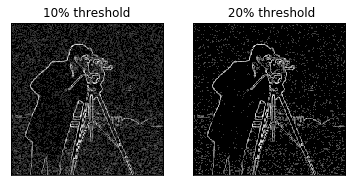

In [142]:
#only sobel
dg_x = cv2.Sobel(img_dg,cv2.CV_64F,1,0,ksize=3)
dg_y = cv2.Sobel(img_dg,cv2.CV_64F,0,1,ksize=3)
dg_m = cv2.magnitude(dg_x, dg_y)

max_mag = np.max(dg_m)

det,dg_sthresh1 = cv2.threshold(dg_m,0.1*max_mag,0,cv2.THRESH_TOZERO)
det,dg_sthresh2 = cv2.threshold(dg_m,0.2*max_mag,0,cv2.THRESH_TOZERO)

plt.subplot(121), plt.imshow(dg_sthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('10% threshold')

plt.subplot(122),plt.imshow(dg_sthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title(' 20% threshold')
plt.show()


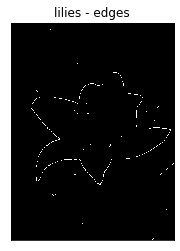

In [143]:
#Canny Edge Detection
img_path_canny = "./yellowlily.png"
img_canny = cv2.imread(img_path_canny)
img_canny = cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB)

I_edge = cv2.Canny(img_canny, 680, 750, apertureSize=3)



plt.imshow(I_edge, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('lilies - edges')
plt.show()